Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


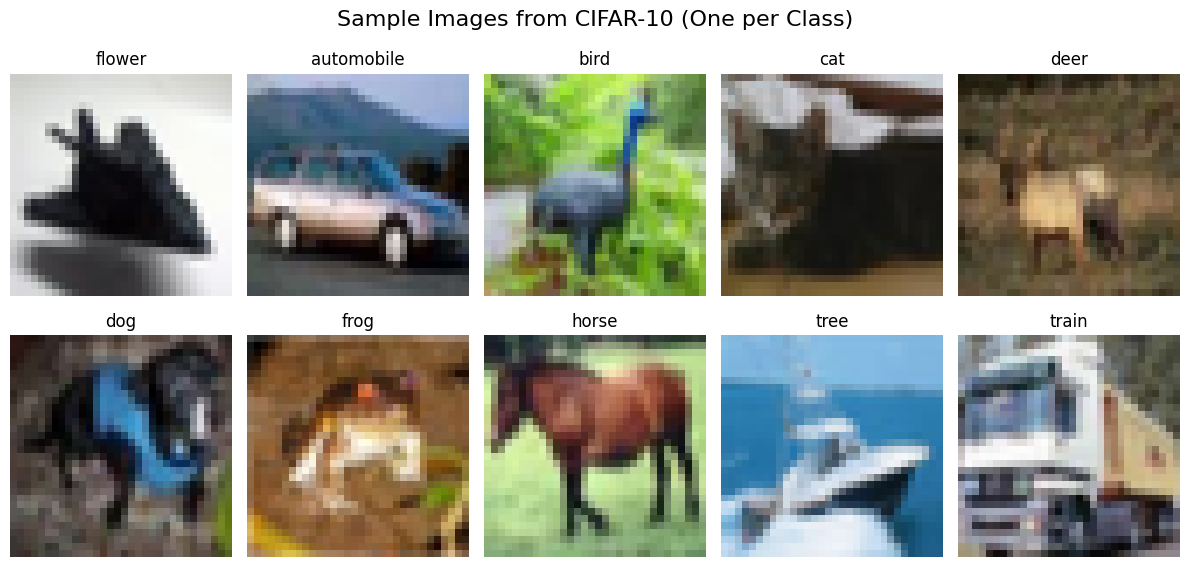

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Class names in CIFAR-10
class_names = ['flower', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'tree', 'train']

# Print dataset shapes
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Visualize sample images from each class
plt.figure(figsize=(12, 6))
for i, class_name in enumerate(class_names):
    # Find the first occurrence of each class
    idx = np.where(y_train.flatten() == i)[0][0]
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[idx])
    plt.title(class_name)
    plt.axis('off')

plt.suptitle("Sample Images from CIFAR-10 (One per Class)", fontsize=16)
plt.tight_layout()
plt.show()


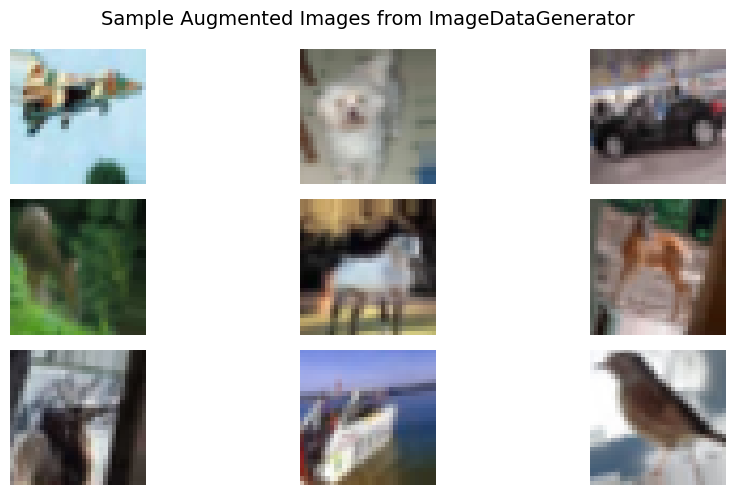

In [5]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0, 1]
X_train_norm = X_train.astype('float32') / 255.0
X_test_norm = X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Setup ImageDataGenerator for augmentation
data_gen = ImageDataGenerator(
    rotation_range=15,         # random rotation in the range
    width_shift_range=0.1,     # random horizontal shift
    height_shift_range=0.1,    # random vertical shift
    horizontal_flip=True,      # randomly flip images
    zoom_range=0.1             # random zoom
)

# Fit the generator on training data
data_gen.fit(X_train_norm)

# Visualize some augmented images from one batch
plt.figure(figsize=(10, 5))
for x_batch, y_batch in data_gen.flow(X_train_norm, y_train_cat, batch_size=9):
    for j in range(9):
        plt.subplot(3, 3, j + 1)
        plt.imshow(x_batch[j])
        plt.axis('off')
    plt.suptitle('Sample Augmented Images from ImageDataGenerator', fontsize=14)
    plt.tight_layout()
    plt.show()
    break  # Display only one batch


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Build the feedforward neural network model
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),   # Flatten 32x32x3 image to 3072 features
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')     # 10 output classes for CIFAR-10
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()

# Train the model
history = model.fit(
    X_train_norm, y_train_cat,
    batch_size=64,
    epochs=15,
    validation_split=0.2,
    verbose=2
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 820,874 (3.13 MB)

 Trainable params: 820,874 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
625/625 - 13s - 21ms/step - accuracy: 0.2032 - loss: 2.1037 - val_accuracy: 0.2694 - val_loss: 1.9685
Epoch 2/15
625/625 - 20s - 32ms/step - accuracy: 0.2367 - loss: 2.0069 - val_accuracy: 0.2851 - val_loss: 1.9340
Epoch 3/15
625/625 - 11s - 18ms/step - accuracy: 0.2550 - loss: 1.9701 - val_accuracy: 0.3120 - val_loss: 1.8992
Epoch 4/15
625/625 - 10s - 16ms/step - accuracy: 0.2620 - loss: 1.9635 - val_accuracy: 0.3115 - val_loss: 1.9023
Epoch 5/15
625/625 - 11s - 17ms/step - accuracy: 0.2728 - loss: 1.9337 - val_accuracy: 0.3244 - val_loss: 1.8787
Epoch 6/15
625/625 - 20s - 33ms/step - accuracy: 0.2817 - loss: 1.9266 - val_accuracy: 0.3177 - val_loss: 1.8766
Epoch 7/15
625/625 - 11s - 18ms/step - accuracy: 0.2914 - loss: 1.9063 - val_accuracy: 0.3192 - val_loss: 1.8808
Epoch 8/15
625/625 - 18s - 29ms/step - accuracy: 0.2958 - loss: 1.8966 - val_accuracy: 0.3342 - val_loss: 1.8530
Epoch 9/15
625/625 - 19s - 31ms/step - accuracy: 0.3009 - loss: 1.8922 - val_accuracy: 0.3334 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test Accuracy: 0.3438
Test Precision: 0.3853
Test Recall: 0.3438
Test F1-score: 0.3141

Classification Report:
               precision    recall  f1-score   support

      flower       0.61      0.12      0.21      1000
  automobile       0.40      0.57      0.47      1000
        bird       0.30      0.03      0.05      1000
         cat       0.21      0.35      0.27      1000
        deer       0.30      0.26      0.27      1000
         dog       0.50      0.18      0.26      1000
        frog       0.31      0.71      0.43      1000
       horse       0.43      0.32      0.36      1000
        tree       0.45      0.34      0.39      1000
       train       0.35      0.56      0.43      1000

    accuracy                           0.34     10000
   macro avg       0.39      0.34      0.31     10000
weighted avg       0.39      0.34      0.31     10000



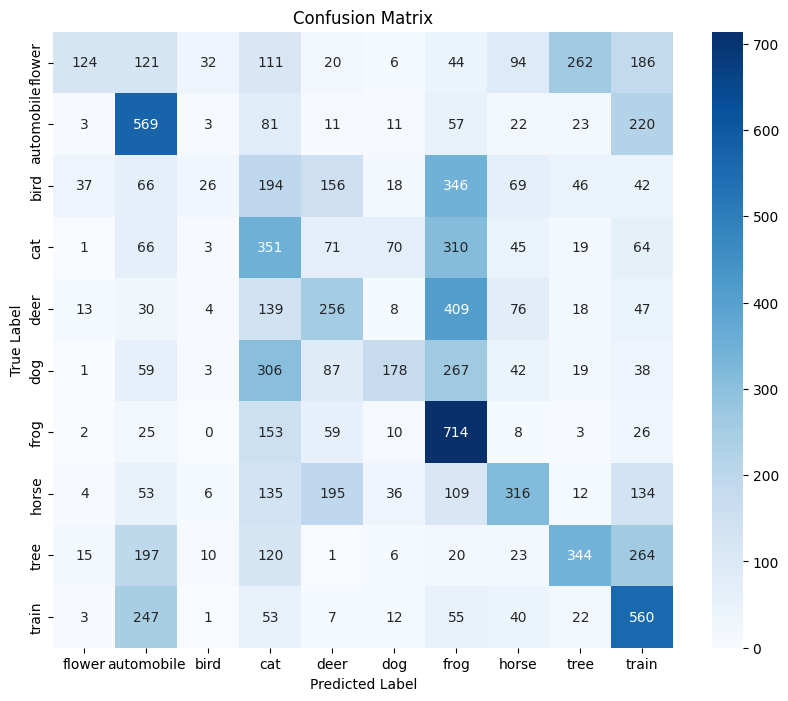

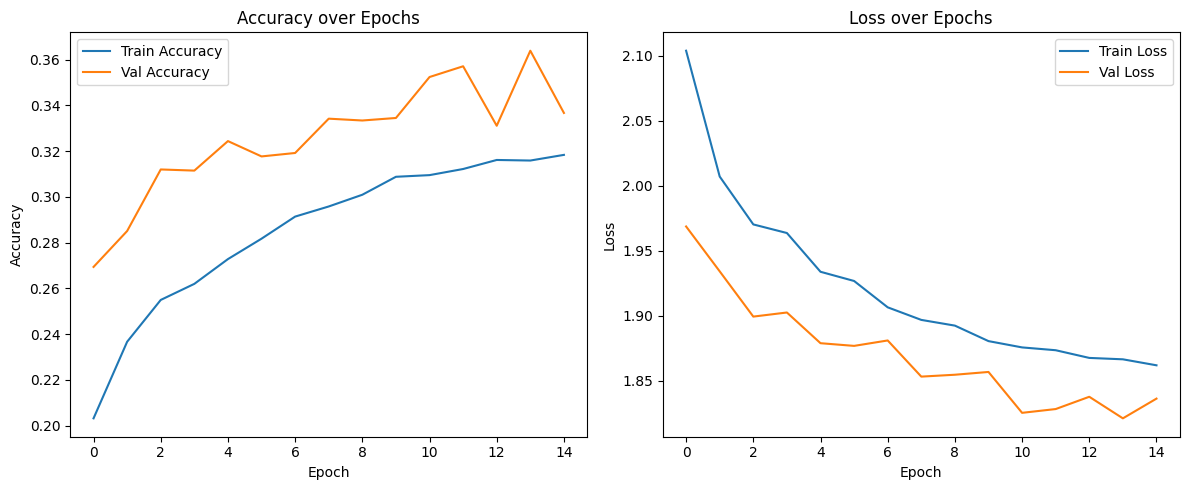

In [8]:
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict class probabilities for the test set
y_pred_prob = model.predict(X_test_norm)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = y_test.flatten()  # Convert y_test to 1D

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print metrics
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-score: {f1:.4f}")

# Print classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=class_names))

# Confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot training & validation accuracy/loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Build an improved feedforward neural network
improved_model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(10, activation='softmax')  # CIFAR-10 has 10 classes
])

# Compile the model
improved_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Set training parameters
batch_size = 64
epochs = 20

# Train with data augmentation
history_aug = improved_model.fit(
    data_gen.flow(X_train_norm, y_train_cat, batch_size=batch_size),
    steps_per_epoch=len(X_train_norm) // batch_size,
    epochs=epochs,
    validation_data=(X_test_norm, y_test_cat),
    verbose=2
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
781/781 - 56s - 72ms/step - accuracy: 0.2856 - loss: 2.1124 - val_accuracy: 0.3697 - val_loss: 1.7382
Epoch 2/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 - 5s - 7ms/step - accuracy: 0.2344 - loss: 2.2520 - val_accuracy: 0.3659 - val_loss: 1.7454
Epoch 3/20
781/781 - 54s - 70ms/step - accuracy: 0.3396 - loss: 1.8447 - val_accuracy: 0.4018 - val_loss: 1.6715
Epoch 4/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 - 3s - 3ms/step - accuracy: 0.4062 - loss: 1.9125 - val_accuracy: 0.4022 - val_loss: 1.6681
Epoch 5/20
781/781 - 53s - 68ms/step - accuracy: 0.3562 - loss: 1.7958 - val_accuracy: 0.4192 - val_loss: 1.6254
Epoch 6/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 - 3s - 3ms/step - accuracy: 0.2500 - loss: 1.9723 - val_accuracy: 0.4207 - val_loss: 1.6237
Epoch 7/20
781/781 - 80s - 102ms/step - accuracy: 0.3595 - loss: 1.7797 - val_accuracy: 0.4083 - val_loss: 1.6674
Epoch 8/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 - 3s - 3ms/step - accuracy: 0.3906 - loss: 1.5885 - val_accuracy: 0.3987 - val_loss: 1.6922
Epoch 9/20
781/781 - 53s - 68ms/step - accuracy: 0.3689 - loss: 1.7646 - val_accuracy: 0.4155 - val_loss: 1.6145
Epoch 10/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 - 3s - 3ms/step - accuracy: 0.2969 - loss: 1.8641 - val_accuracy: 0.4111 - val_loss: 1.6204
Epoch 11/20
781/781 - 80s - 103ms/step - accuracy: 0.3716 - loss: 1.7527 - val_accuracy: 0.4231 - val_loss: 1.5972
Epoch 12/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 - 3s - 3ms/step - accuracy: 0.3281 - loss: 1.9154 - val_accuracy: 0.4240 - val_loss: 1.5964
Epoch 13/20
781/781 - 79s - 102ms/step - accuracy: 0.3758 - loss: 1.7483 - val_accuracy: 0.4456 - val_loss: 1.5591
Epoch 14/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 - 5s - 7ms/step - accuracy: 0.4375 - loss: 1.7483 - val_accuracy: 0.4450 - val_loss: 1.5612
Epoch 15/20
781/781 - 79s - 102ms/step - accuracy: 0.3780 - loss: 1.7363 - val_accuracy: 0.4555 - val_loss: 1.5483
Epoch 16/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 - 3s - 3ms/step - accuracy: 0.3906 - loss: 1.8707 - val_accuracy: 0.4532 - val_loss: 1.5485
Epoch 17/20
781/781 - 76s - 97ms/step - accuracy: 0.3756 - loss: 1.7411 - val_accuracy: 0.4336 - val_loss: 1.5760
Epoch 18/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 - 3s - 3ms/step - accuracy: 0.4062 - loss: 1.6857 - val_accuracy: 0.4328 - val_loss: 1.5730
Epoch 19/20
781/781 - 54s - 69ms/step - accuracy: 0.3722 - loss: 1.7471 - val_accuracy: 0.4476 - val_loss: 1.5587
Epoch 20/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 - 3s - 3ms/step - accuracy: 0.3906 - loss: 1.5497 - val_accuracy: 0.4403 - val_loss: 1.6347
